In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import dataset through API

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedmustafa/real-life-violence-situations-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


## Label the videos as 1 (for violent) and 0 (for non violent)

In [3]:
import os
import random

# Define the dataset path (Modify this if your dataset is in a different location)
DATASET_PATH = os.path.join(path, "Real Life Violence Dataset")

# Define the paths to the two categories
violent_dir = os.path.join(DATASET_PATH, "Violence")     # Path to 'Violence' videos
nonviolent_dir = os.path.join(DATASET_PATH, "NonViolence")  # Path to 'NonViolence' videos

# Allowed video extensions (modify if needed)
video_extensions = (".mp4", ".avi")  

# Function to get video file paths
def get_video_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(video_extensions)]

# Get all video files
violent_videos = get_video_paths(violent_dir)
nonviolent_videos = get_video_paths(nonviolent_dir)

# Shuffle and select exactly 100 videos from each category
random.shuffle(violent_videos)
random.shuffle(nonviolent_videos)

selected_violent = violent_videos[:700]
selected_nonviolent = nonviolent_videos[:700]

# Assign labels
video_data = [(video, 1) for video in selected_violent] + [(video, 0) for video in selected_nonviolent]

# Shuffle the final dataset to mix labels
random.shuffle(video_data)

# Print 5 random samples to verify
print("Random video paths and labels:")
random_samples = random.sample(video_data, min(5, len(video_data)))  # Pick 5 random samples safely
for sample in random_samples:
    print(sample)

# Total counts for sanity check
print(f"Total videos labeled: {len(video_data)}")
print(f"Violent videos: {sum(1 for _, label in video_data if label == 1)}")
print(f"Non-violent videos: {sum(1 for _, label in video_data if label == 0)}")

Random video paths and labels:
('/kaggle/input/Real Life Violence Dataset/NonViolence/NV_292.mp4', 0)
('/kaggle/input/Real Life Violence Dataset/Violence/V_246.mp4', 1)
('/kaggle/input/Real Life Violence Dataset/NonViolence/NV_915.mp4', 0)
('/kaggle/input/Real Life Violence Dataset/Violence/V_588.mp4', 1)
('/kaggle/input/Real Life Violence Dataset/Violence/V_283.mp4', 1)
Total videos labeled: 1400
Violent videos: 700
Non-violent videos: 700


## Perform a train test split of 80-20 (train contains 80% violent+ 80% non violent)

In [4]:
from sklearn.model_selection import train_test_split

# Separate videos into violent and non-violent based on labels
violent_videos = [video for video, label in video_data if label == 1]
nonviolent_videos = [video for video, label in video_data if label == 0]

# Split violent videos (630 train, 70 test)
train_violent, test_violent = train_test_split(violent_videos, test_size=0.1, random_state=42)

# Split non-violent videos (630 train, 70 test)
train_nonviolent, test_nonviolent = train_test_split(nonviolent_videos, test_size=0.1, random_state=42)

# Combine into training and testing datasets
train_data = [(video, 1) for video in train_violent] + [(video, 0) for video in train_nonviolent]
test_data = [(video, 1) for video in test_violent] + [(video, 0) for video in test_nonviolent]

# Shuffle to ensure randomness
random.shuffle(train_data)
random.shuffle(test_data)

# Verify split
print(f"Training set: {len(train_data)} videos (Violent: {len(train_violent)}, Non-Violent: {len(train_nonviolent)})")
print(f"Testing set: {len(test_data)} videos (Violent: {len(test_violent)}, Non-Violent: {len(test_nonviolent)})")

# Print some samples for verification
print()
print("Random training sample:", random.sample(train_data, 5))
print();
print("Random testing sample:", random.sample(test_data, 5))


Training set: 1260 videos (Violent: 630, Non-Violent: 630)
Testing set: 140 videos (Violent: 70, Non-Violent: 70)

Random training sample: [('/kaggle/input/Real Life Violence Dataset/Violence/V_168.mp4', 1), ('/kaggle/input/Real Life Violence Dataset/Violence/V_763.mp4', 1), ('/kaggle/input/Real Life Violence Dataset/Violence/V_627.mp4', 1), ('/kaggle/input/Real Life Violence Dataset/NonViolence/NV_814.mp4', 0), ('/kaggle/input/Real Life Violence Dataset/Violence/V_759.mp4', 1)]

Random testing sample: [('/kaggle/input/Real Life Violence Dataset/Violence/V_261.mp4', 1), ('/kaggle/input/Real Life Violence Dataset/NonViolence/NV_724.mp4', 0), ('/kaggle/input/Real Life Violence Dataset/Violence/V_932.mp4', 1), ('/kaggle/input/Real Life Violence Dataset/NonViolence/NV_465.mp4', 0), ('/kaggle/input/Real Life Violence Dataset/NonViolence/NV_119.mp4', 0)]


## Plot distribution of training and testing data

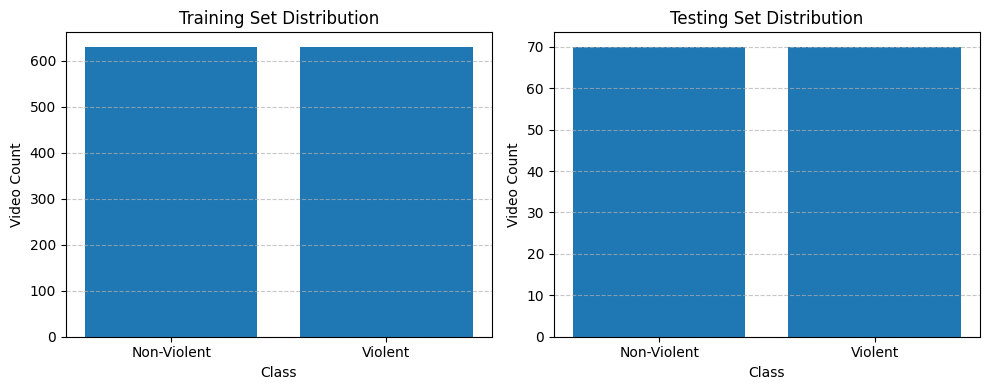

In [5]:
import matplotlib.pyplot as plt

# Count the number of violent (label=1) and non-violent (label=0) videos in train and test sets
train_labels = [label for _, label in train_data]
test_labels = [label for _, label in test_data]

# Plot histogram for training set
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(train_labels, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Non-Violent', 'Violent'])
plt.xlabel("Class")
plt.ylabel("Video Count")
plt.title("Training Set Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(test_labels, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Non-Violent', 'Violent'])
plt.xlabel("Class")
plt.ylabel("Video Count")
plt.title("Testing Set Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


## Function to extract the frames from the videos and Getting the frames from the videos and creating (frames,label) tuples

In [6]:
from tqdm import tqdm
import cv2
# Define parameters for frame extraction
FRAME_COUNT = 16  # Number of frames to sample per video
FRAME_SIZE = (224, 224)  # Resize frames to 224x224

def extract_frames(video_path, frame_count=FRAME_COUNT, frame_size=FRAME_SIZE):
    """
    Extracts a fixed number of frames from a video file.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return None
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, frame_count, dtype=int)
    frames = []
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        success, frame = cap.read()
        if success:
            frame = cv2.resize(frame, frame_size)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        else:
            print(f"Warning: Could not read frame {idx} from {video_path}")
    cap.release()
    return np.array(frames) if len(frames) == frame_count else None

# Initialize lists to store processed data
train_frames = []  # Stores (frames, label) for training data
test_frames = []   # Stores (frames, label) for testing data

def process_dataset(video_list, is_train=True):
    """
    Extracts frames from videos and stores them with labels.
    """
    global train_frames, test_frames  
    data_storage = train_frames if is_train else test_frames
    desc = "Processing Training Videos" if is_train else "Processing Testing Videos"
    for video_path, label in tqdm(video_list, desc=desc):
        frames = extract_frames(video_path)
        if frames is not None:
            data_storage.append((frames, label))
        else:
            print(f"Skipping {video_path} due to extraction failure.")
    print(f"Total {desc}: {len(data_storage)} videos processed.")

# Process training and testing datasets
process_dataset(train_data, is_train=True)
process_dataset(test_data, is_train=False)

# Sanity check
print(f"Training dataset size: {len(train_frames)} videos")
print(f"Testing dataset size: {len(test_frames)} videos")

Processing Training Videos:  78%|███████▊  | 984/1260 [09:33<05:39,  1.23s/it]

Skipping /kaggle/input/Real Life Violence Dataset/NonViolence/NV_360.mp4 due to extraction failure.


Processing Training Videos:  88%|████████▊ | 1103/1260 [10:59<03:31,  1.35s/it]

Skipping /kaggle/input/Real Life Violence Dataset/NonViolence/NV_362.mp4 due to extraction failure.


Processing Training Videos: 100%|██████████| 1260/1260 [12:25<00:00,  1.69it/s]


Total Processing Training Videos: 1258 videos processed.


Processing Testing Videos: 100%|██████████| 140/140 [01:26<00:00,  1.61it/s]

Total Processing Testing Videos: 140 videos processed.
Training dataset size: 1258 videos
Testing dataset size: 140 videos


## Again plotting the distribution of train_frames and test_frames

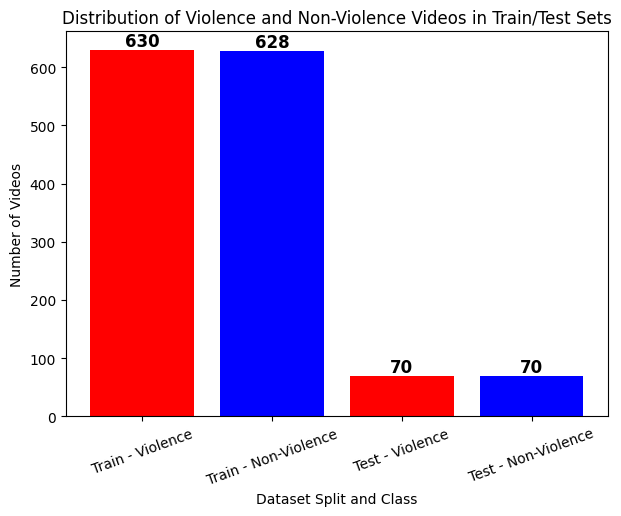

In [7]:
import matplotlib.pyplot as plt

# Count occurrences of each label in train_frames and test_frames
train_violence_count = sum(1 for _, label in train_frames if label == 1)
train_nonviolence_count = sum(1 for _, label in train_frames if label == 0)
test_violence_count = sum(1 for _, label in test_frames if label == 1)
test_nonviolence_count = sum(1 for _, label in test_frames if label == 0)

# Data for plotting
categories = ["Train - Violence", "Train - Non-Violence", "Test - Violence", "Test - Non-Violence"]
counts = [train_violence_count, train_nonviolence_count, test_violence_count, test_nonviolence_count]

# Plot histogram
plt.figure(figsize=(7, 5))
bars = plt.bar(categories, counts, color=["red", "blue", "red", "blue"])

# Annotate bars with exact counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Dataset Split and Class")
plt.ylabel("Number of Videos")
plt.title("Distribution of Violence and Non-Violence Videos in Train/Test Sets")
plt.xticks(rotation=20)  # Rotate labels for better visibility
plt.show()


## Normalizing the images

In [8]:
import numpy as np

# ImageNet normalization values
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def normalize_frames(frames):
    """
    Normalizes a NumPy array of frames using ImageNet mean and std.
    Assumes frames are in range [0, 255].
    """
    frames = frames.astype(np.float32) / 255.0  # Convert to [0,1]
    frames = (frames - imagenet_mean) / imagenet_std  # Normalize

    # Change shape from (16, 224, 224, 3) to (16, 3, 224, 224)
    frames = np.transpose(frames, (0, 3, 1, 2))  

    return frames

# Apply normalization to train_frames and test_frames
train_frames = [(normalize_frames(frames), label) for frames, label in train_frames]
test_frames = [(normalize_frames(frames), label) for frames, label in test_frames]

# Sanity check
print(f"Sample shape after normalization: {train_frames[0][0].shape}")  # Should be (16, 3, 224, 224)
print(f"Label: {train_frames[0][1]}")


Sample shape after normalization: (16, 3, 224, 224)
Label: 0


## Creating pytorch dataset and dataloader(to load the videos in batches of 8)

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader

class VideoDataset(Dataset):
    """
    Custom PyTorch dataset for video classification.

    Each sample consists of:
    - frames: A tensor of shape (16, 3, 224, 224) representing the video frames.
    - label: The class label (0: Non-Violence, 1: Violence).
    """

    def __init__(self, data):
        """
        Initializes the dataset.

        Parameters:
            data (list): List of (frames, label) pairs.
        """
        self.data = data

    def __len__(self):
        """Returns the total number of videos in the dataset."""
        return len(self.data)

    def __getitem__(self, idx):
        """Retrieves the frames and label at index idx."""
        frames, label = self.data[idx]  # Extract (frames, label)

        # Convert frames and label to PyTorch tensors
        frames = torch.tensor(frames, dtype=torch.float32)  # Shape: (16, 224, 224, 3)
        label = torch.tensor(label, dtype=torch.long)

        return frames, label

# Create dataset instances
train_dataset = VideoDataset(train_frames)
test_dataset = VideoDataset(test_frames)

# Create DataLoaders for batching
batch_size = 4  # Adjust as needed

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Sanity check
sample_frames, sample_label = next(iter(train_loader))
print(f"Batch shape: {sample_frames.shape}, Labels: {sample_label}")


Batch shape: torch.Size([4, 16, 3, 224, 224]), Labels: tensor([1, 0, 0, 1])


## Loading a pretrained ViVit model from transformers(Hugging face) - ViViT-FE

In [10]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from transformers import VideoMAEForVideoClassification, VideoMAEImageProcessor

# ✅ Load Pretrained VideoMAE Model
model_name = "MCG-NJU/videomae-base"
model = VideoMAEForVideoClassification.from_pretrained(model_name)

# ✅ Modify Final Layer for Binary Classification
num_features = model.classifier.in_features  # Get input size of the classifier layer
model.classifier = nn.Linear(num_features, 2)  # Replace with 2 output classes

# ✅ Define Preprocessing (Normalization)
processor = VideoMAEImageProcessor.from_pretrained(model_name)

# ✅ Move Model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ✅ Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# ✅ Print Model Summary
print(model)


config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/377M [00:00<?, ?B/s]

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

VideoMAEForVideoClassification(
  (videomae): VideoMAEModel(
    (embeddings): VideoMAEEmbeddings(
      (patch_embeddings): VideoMAEPatchEmbeddings(
        (projection): Conv3d(3, 768, kernel_size=(2, 16, 16), stride=(2, 16, 16))
      )
    )
    (encoder): VideoMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x VideoMAELayer(
          (attention): VideoMAESdpaAttention(
            (attention): VideoMAESdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): VideoMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): VideoMAEIntermediate(
            (den

In [11]:
import torch

# Create a dummy input tensor
dummy_input = torch.randn(2, 16, 3, 224, 224)  # (batch_size=2, channels=3, frames=16, height=224, width=224)
dummy_input = dummy_input.to(device)  # Move input to GPU
# Run a forward pass
output = model(dummy_input)

print(output.logits.shape)  # Should be (2, num_classes)


torch.Size([2, 2])


#### torch: PyTorch, used for deep learning.
#### torch.nn: Contains neural network layers and loss functions.
#### transformers: Hugging Face library for transformer-based models.
#### VideoMAEForVideoClassification: The pretrained ViViT model (Video Masked Autoencoder).
#### VideoMAEImageProcessor: Handles video preprocessing (e.g., resizing, normalization).

## Training the model

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.amp import autocast, GradScaler

# === Further Splitting Train Dataset into Train & Validation ===
violence_samples = [i for i, (_, label) in enumerate(train_frames) if label == 1]  # Violence indices
non_violence_samples = [i for i, (_, label) in enumerate(train_frames) if label == 0]  # Non-Violence indices

# 90-10 Split within Train Set
violence_train = violence_samples[:568]  # 90% of 630
violence_val = violence_samples[568:]    # 10% of 630

non_violence_train = non_violence_samples[:568]  # 90% of 630
non_violence_val = non_violence_samples[568:]    # 10% of 630

# Combine new train & validation indices
train_indices = violence_train + non_violence_train
val_indices = violence_val + non_violence_val

# Create subset datasets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
batch_size = 4  # Adjust if needed
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Sanity check
sample_frames, sample_label = next(iter(train_loader))
print(f"Batch shape: {sample_frames.shape}, Labels: {sample_label}")

# === Model Setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Optimizer

scaler = GradScaler()  # For mixed precision training


Batch shape: torch.Size([4, 16, 3, 224, 224]), Labels: tensor([0, 0, 0, 0])


In [13]:
import torch
import torch.nn.functional as F
from torch.amp import autocast, GradScaler
from tqdm import tqdm

# === Training with Mixed Precision, Early Stopping & Checkpointing ===
num_epochs = 10
patience = 3  # Stop if no improvement after 3 epochs
best_val_loss = float('inf')
counter = 0

train_losses = []  # Store training loss for plotting
val_losses = []  # Store validation loss for plotting

scaler = GradScaler()  # For mixed precision training
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", leave=False)
    for frames, labels in train_loader_tqdm:
        frames, labels = frames.to(device, non_blocking=True), labels.to(device, non_blocking=True).long()
        optimizer.zero_grad()

        with autocast(device_type="cuda"):  # Mixed precision
            outputs = model(frames)
            if hasattr(outputs, "logits"):
                outputs = outputs.logits  # Fix potential issue
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()  
        scaler.step(optimizer)  
        scaler.update()  

        running_loss += loss.item()

        # Update progress bar
        train_loader_tqdm.set_postfix(loss=loss.item())

        # Free memory
        del frames, labels, outputs, loss
        torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # === Validation Step ===
    model.eval()
    val_loss = 0.0

    val_loader_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", leave=False)
    with torch.no_grad():
        for frames, labels in val_loader_tqdm:
            frames, labels = frames.to(device, non_blocking=True), labels.to(device, non_blocking=True).long()

            with autocast(device_type="cuda"):
                outputs = model(frames)
                if hasattr(outputs, "logits"):
                    outputs = outputs.logits  
                loss = criterion(outputs, labels)

            val_loss += loss.item()

            # Update progress bar
            val_loader_tqdm.set_postfix(loss=loss.item())

            # Free memory
            del frames, labels, outputs, loss
            torch.cuda.empty_cache()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"\nEpoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Adjust learning rate
    scheduler.step(val_loss)

    # === Early Stopping & Checkpointing ===
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")  
    else:
        counter += 1


print("Training complete! 🚀")



Epoch [1/10] - Train Loss: 0.4280, Val Loss: 0.5297



Epoch [2/10] - Train Loss: 0.2750, Val Loss: 0.2058



Epoch [3/10] - Train Loss: 0.1732, Val Loss: 0.1944



Epoch [4/10] - Train Loss: 0.1384, Val Loss: 0.1802



Epoch [5/10] - Train Loss: 0.1207, Val Loss: 0.1717



Epoch [6/10] - Train Loss: 0.0886, Val Loss: 0.3426



Epoch [7/10] - Train Loss: 0.0752, Val Loss: 0.2482



Epoch [8/10] - Train Loss: 0.0623, Val Loss: 0.5994



Epoch [9/10] - Train Loss: 0.0310, Val Loss: 0.4120



Epoch [10/10] - Train Loss: 0.0073, Val Loss: 0.4564
Training complete! 🚀


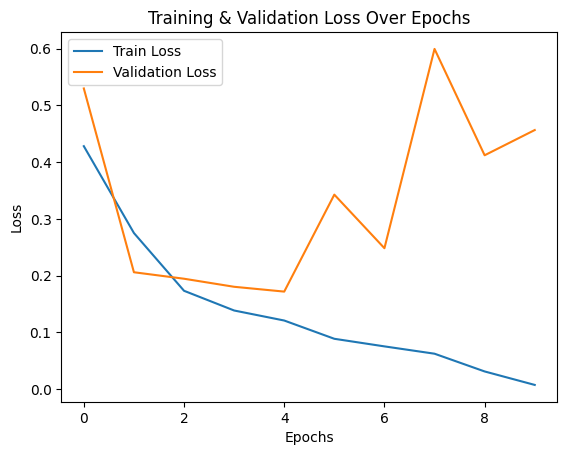

Training complete. Best model saved as 'best_model.pth'.


In [14]:
# === Loss Plotting ===
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss Over Epochs")
plt.show()

print("Training complete. Best model saved as 'best_model.pth'.")

Test Accuracy: 0.9143
Precision: 0.9028
Recall: 0.9286
F1-Score: 0.9155

Confusion Matrix:
 [[63  7]
 [ 5 65]]


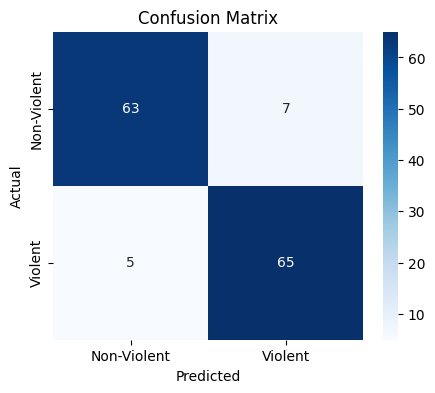

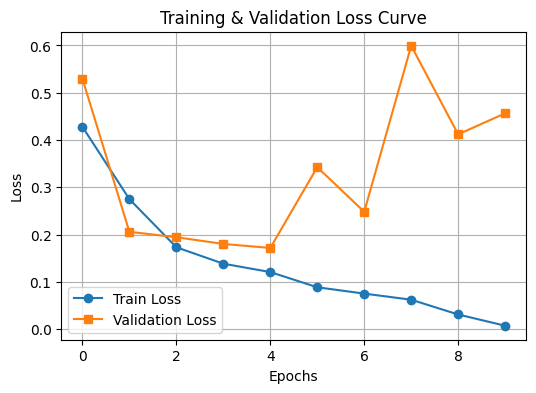

In [15]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# === Load Best Model ===
model.load_state_dict(torch.load("best_model.pth", weights_only=True))
model.to(device)
model.eval()

# === Initialize Lists ===
all_labels = []
all_preds = []

# === Inference on Test Set ===
with torch.no_grad():
    for frames, labels in test_loader:
        frames, labels = frames.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        
        outputs = model(frames).logits  
        preds = torch.argmax(outputs, dim=1)  # Get class with highest probability
        
        all_labels.extend(labels.cpu().numpy())  
        all_preds.extend(preds.cpu().numpy())  

# === Convert to NumPy Arrays ===
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# === Compute Metrics ===
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average="binary")  # Binary classification
recall = recall_score(all_labels, all_preds, average="binary")
f1 = f1_score(all_labels, all_preds, average="binary")
conf_matrix = confusion_matrix(all_labels, all_preds)

# === Print Metrics ===
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)

# === Plot Confusion Matrix ===
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Violent", "Violent"], yticklabels=["Non-Violent", "Violent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === Plot Train & Validation Loss Curves ===
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label="Train Loss", marker="o")
plt.plot(val_losses, label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curve")
plt.legend()
plt.grid()
plt.show()


In [16]:
import torch.nn.functional as F

# === Initialize Loss Function ===
criterion = torch.nn.CrossEntropyLoss()

# === Compute Cross-Entropy Loss on Test Set ===
total_loss = 0.0
num_samples = 0

with torch.no_grad():
    for frames, labels in test_loader:
        frames, labels = frames.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        
        outputs = model(frames).logits  
        loss = criterion(outputs, labels)  # Compute loss
        
        total_loss += loss.item() * labels.size(0)  # Sum losses weighted by batch size
        num_samples += labels.size(0)

# === Compute Average Loss ===
test_cross_entropy_loss = total_loss / num_samples
print(f"Test Cross-Entropy Loss: {test_cross_entropy_loss:.4f}")


Test Cross-Entropy Loss: 0.2296
